# Customer Churn Classification

The initiative aims to identify customers who are at risk of leaving by utilizing predictive models such as logistic regression and decision trees. This enables businesses to take proactive measures and create targeted retention campaigns.


Its performance is assessed using metrics including F1-score, recall, accuracy, and precision. With the model's results at their disposal, businesses may create proactive customer service initiatives, advertising campaigns, and customized deals to boost client satisfaction and loyalty.



## Import libraries

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import mutual_info_score
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The dataset has the following columns:
- CustomerID: includes the customer's ID.
- Gender: whether the client is a woman or a man
- SeniorCitizen: Regardless on whether the client is elderly (1, 0)
- Partner: Whether or not the client has a partner (Yes, No)
- Dependents: Whether or if the client has dependents (Yes, No)
- Tenure: The length of time the client has been with the business
- PhoneService: Whether or not the client has phone service (Yes, No)
- MultipleLines: If the client has more than one line (Yes, No, No phone service)
- InternetService: Internet service provider of the client
- OnlineSecurity: Whether or whether the client has internet security (yes, no, or no)
- OnlineBackup: Whether or if the client has internet backup (yes, no, or no service)
- DeviceProtection: Whether the client has internet service or not, or whether they have device protection
- TechSupport: Whether the client has internet service (yes, no, or no) or not
- streamingTV: Whether the client has internet service (yes, no, or no) or streaming TV
- streamingMovies: Whether or not the client has internet service (Yes, No, or No) and can stream movies
- Contract: The customer's contract duration (month-to-month, one-year, or two-year)
- PaperlessBilling: Whether or not the client has paperless billing (Yes, No)
- PaymentMethod: The payment mechanism used by the consumer (credit card, bank transfer, electronic check, or mailed check)
- MonthlyCharges: The monthly sum that the customer is charged
- TotalCharges: The entire sum that was billed to the client
- Churn: Whether or if the client left (Yes or No)


# Data Preprocessing

# Clean the first train dataset

In [63]:
data = pd.read_csv('/content/LP2_Telco_churn_first_3000.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [64]:
del data["customerID"]

In [65]:
# convert boolean to object
object_conversion = {'Partner': object,
               'SeniorCitizen': object,
               'Dependents': object,
               'PhoneService': object,
               'PaperlessBilling': object}
data = data.astype(object_conversion)

In [66]:
# Convert Yes and No to True and False in object columns
replace_values = {True: 'Yes', False: 'No'}

# Use replace() method
data['Partner'] = data['Partner'].replace(replace_values)
data['SeniorCitizen'] = data['SeniorCitizen'].replace(replace_values)
data['Dependents'] = data['Dependents'].replace(replace_values)
data['PhoneService'] = data['PhoneService'].replace(replace_values)
data['MultipleLines'] = data['MultipleLines'].replace(replace_values)
data['OnlineSecurity'] = data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup'] = data['OnlineBackup'].replace(replace_values)
data['DeviceProtection'] = data['DeviceProtection'].replace(replace_values)
data['TechSupport'] = data['TechSupport'].replace(replace_values)
data['StreamingTV'] = data['StreamingTV'].replace(replace_values)
data['StreamingMovies'] = data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(replace_values)
data['Churn'] = data['Churn'].replace(replace_values)

In [67]:
data['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [68]:
data['Churn'].isna().sum()

1

In [69]:
data.dropna(subset='Churn', inplace=True)

In [70]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,269
InternetService,0
OnlineSecurity,651
OnlineBackup,651


Tenure means the time period customers using services. Therefore, rows with a tenure of 0 will be dropped.

In [71]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [72]:
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-72-3d6356277ee9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


## Clean the second train dataset

In [73]:
data_last_2000 = pd.read_csv('/content/LP2_Telco-churn-last-2000.csv')

In [74]:
data_last_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [75]:
# Drop Customer ID column

data_last_2000.drop(columns='customerID', inplace=True)

In [76]:
# change Dtype of TotalCharges column from object to numeric

data_last_2000['TotalCharges'] = pd.to_numeric(data_last_2000['TotalCharges'], errors='coerce')

In [77]:
data_last_2000.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [78]:
# Drop rows where tenure = 0

data_last_2000.drop(labels=data_last_2000[data_last_2000['tenure'] == 0].index, axis=0, inplace=True)

In [79]:
data_last_2000['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,1696
1,344


In [80]:
# Replace 0 values with 'No' and 1 values with 'Yes'

data_last_2000['SeniorCitizen'] = data_last_2000['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [81]:
# change column dtype to object

data_last_2000['SeniorCitizen'] = data_last_2000['SeniorCitizen'].astype('object')

## Merge final train dataset

In [82]:
# merge the test datasets

merged_data = pd.concat([data, data_last_2000], ignore_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   object 
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 


In [83]:
# checking all categorical values

merged_data.describe(include=['object'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
freq,2554,4215,2583,3481,4547,2688,2247,3155,2879,2867,3119,2666,2629,2744,2992,1699,3698


In [84]:
# checking all numerical values

merged_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346402
min,1.000000,18.400000,18.799999
25%,9.000000,35.799999,417.662498
50%,29.000000,70.599998,1401.000000
75%,56.000000,90.050003,3860.599976
max,72.000000,118.650002,8670.100000


In [85]:
# view unique values of each column

for column in merged_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, merged_data[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet se

In [86]:
# check for missing values

merged_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


tenure


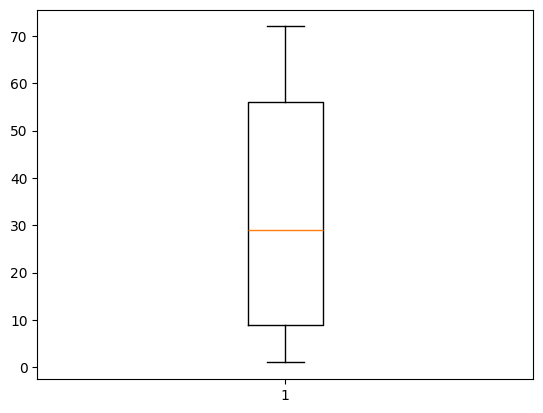

MonthlyCharges


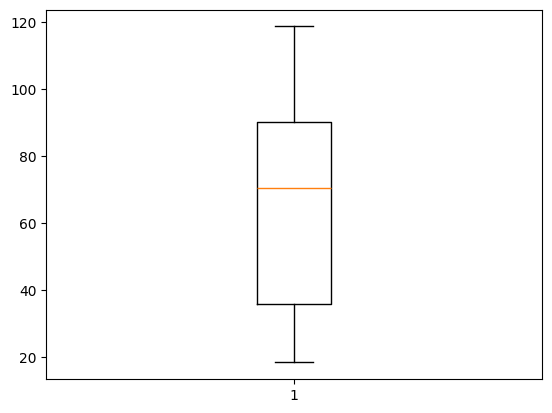

TotalCharges


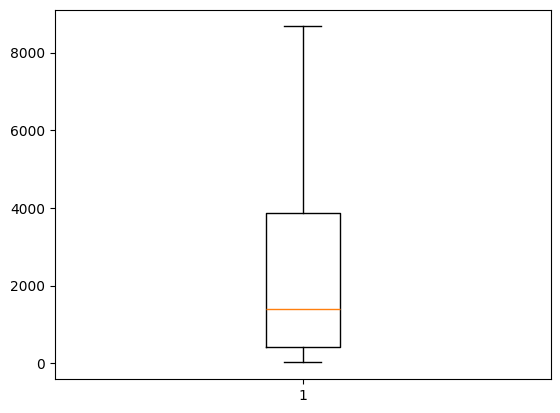

In [87]:
# Check for outliers in the numerical variables
# Use boxplot

for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(merged_data[col])
    plt.show()

- No outliers are found in numeric columns.

Check to see whether variables are normally distributed using the D’Agostino’s K^2 Test.

In [88]:
# D’Agostino’s K^2 Test on monthly charges

stat, p = stats.normaltest(merged_data['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
    print('the sample is normally distributed')
else:
    print('the sample is skewed')

Statistics=7510.47646, p=0.000
the sample is skewed


In [89]:
# D’Agostino’s K^2 Test on tenure

stat, p = stats.normaltest(merged_data['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is skewed')

Statistics=53555.33858, p=0.000
the sample is skewed


In [90]:
## D’Agostino’s K^2 Test on TotalCharges
stat, p = stats.normaltest(merged_data['TotalCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# significance level (5%) for the test
alpha = 0.05

if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is skewed')

Statistics=569.05463, p=0.000
the sample is skewed


In [91]:
# reset index and save to csv

merged_data.reset_index(drop=True, inplace=True)
merged_data.to_csv('Train_Data.csv', index=False)

In [92]:
# view Data Types

print("**Data Types**")
merged_data.dtypes.value_counts()

**Data Types**


,count
object,17
float64,2
int64,1


## Clean test dataset

In [93]:
test_data = pd.read_excel('/content/Telco-churn-second-2000.xlsx')

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [95]:
# change Dtype of TotalCharges column from object to numeric

test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [96]:
# Drop rows where tenure = 0

test_data.drop(labels=test_data[test_data['tenure'] == 0].index, axis=0, inplace=True)

In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1997 non-null   object 
 1   gender            1997 non-null   object 
 2   SeniorCitizen     1997 non-null   int64  
 3   Partner           1997 non-null   object 
 4   Dependents        1997 non-null   object 
 5   tenure            1997 non-null   int64  
 6   PhoneService      1997 non-null   object 
 7   MultipleLines     1997 non-null   object 
 8   InternetService   1997 non-null   object 
 9   OnlineSecurity    1997 non-null   object 
 10  OnlineBackup      1997 non-null   object 
 11  DeviceProtection  1997 non-null   object 
 12  TechSupport       1997 non-null   object 
 13  StreamingTV       1997 non-null   object 
 14  StreamingMovies   1997 non-null   object 
 15  Contract          1997 non-null   object 
 16  PaperlessBilling  1997 non-null   object 
 17  

In [98]:
# Reset index
test_data.reset_index(drop=True, inplace=True)

In [99]:
# check for null values
test_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [100]:
# check dtype of SeniorCitizen column
test_data['SeniorCitizen'].dtypes

dtype('int64')

In [101]:
# Replace 0 values with 'No' and 1 values with 'Yes'
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [102]:
# change dtype to object
test_data['SeniorCitizen'] = test_data['SeniorCitizen'].astype('object')

In [103]:
# view unique values of each column

for column in test_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, test_data[column].unique()))

Column: customerID - Unique Values: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
Column: gender - Unique Values: ['Male' 'Female']
Column: SeniorCitizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42 57 62 20]
Column: PhoneService - Unique Values: ['Yes' 'No']
Column: MultipleLines - Unique Values: ['Yes' 'No' 'No phone service']
Column: InternetService - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: OnlineSecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: DeviceProtection - Unique Values: ['No' 'No internet service' 'Yes']
Column: TechSup

In [104]:
# save test data to csv
test_data.to_csv('Test_Data.csv', index=False)

## Hypothesis Testing

**Null Hypothesis (H0)**:
"There is no significant relationship between customer tenure and churn rate in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer tenure and churn rate in the telecom company."

We want to find the correlation between tenure and churn rates. Since churn rate is a binary outcome, we want to use a **point-biserial** correlation coefficient to assess the significance of the relationship.

In [105]:
# 'Churn' should be a binary variable (0 for no churn, 1 for churn)

df_hypo = merged_data.copy()
df_hypo['Churn'] = df_hypo['Churn'].replace({'No': 0, 'Yes': 1})

# Calculate point-biserial correlation coefficient
correlation_coefficient, p_value = stats.pointbiserialr(df_hypo['Churn'], df_hypo['tenure'])

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Set the significance level (5%)
alpha = 0.05

# Determine if the correlation is statistically significant
if p_value < alpha:
    print("There is a significant correlation between customer tenure and churn rate.")
else:
    print("There is no significant correlation between customer tenure and churn rate.")


Point-Biserial Correlation Coefficient: -0.3526
P-value: 0.0000
There is a significant correlation between customer tenure and churn rate.


<ipython-input-105-49935ced37a6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hypo['Churn'] = df_hypo['Churn'].replace({'No': 0, 'Yes': 1})


- A moderate negative correlation is indicated by the correlation coefficient of -0.3526, which is lower than the average. Accordingly, the turnover rate tends to decline as customer duration rises. Longer-term customers are less likely to start leaving the company.

- There is strong statistical evidence to reject the null hypothesis (no correlation) in favor of the alternative hypothesis (significant correlation), according to the p-value of 0.0000.

# Univariate Analysis

In [106]:
churn_data = merged_data['Churn'].value_counts()
churn_data

,count
Churn,
No,3698
Yes,1336


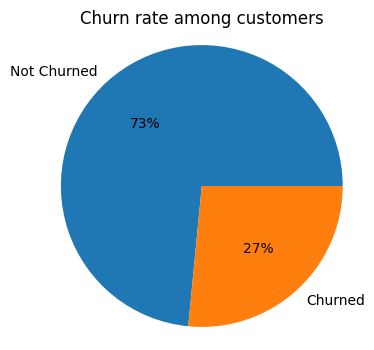

In [107]:
plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'],autopct='%1.0f%%' )

plt.axis('equal')
plt.title('Churn rate among customers')
plt.show()


- The target variable is imbalanced.

### Bivariate & Multivariate Analysis

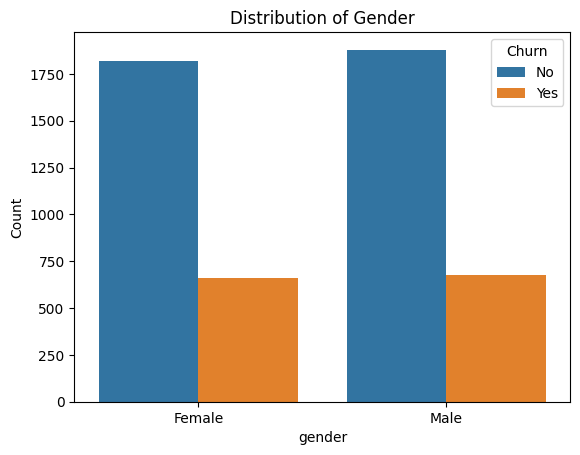

In [108]:
sns.countplot(x='gender',data=merged_data,hue='Churn')
plt.title('Distribution of Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

- There is no significant difference between gender and churn rate.

##### 1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

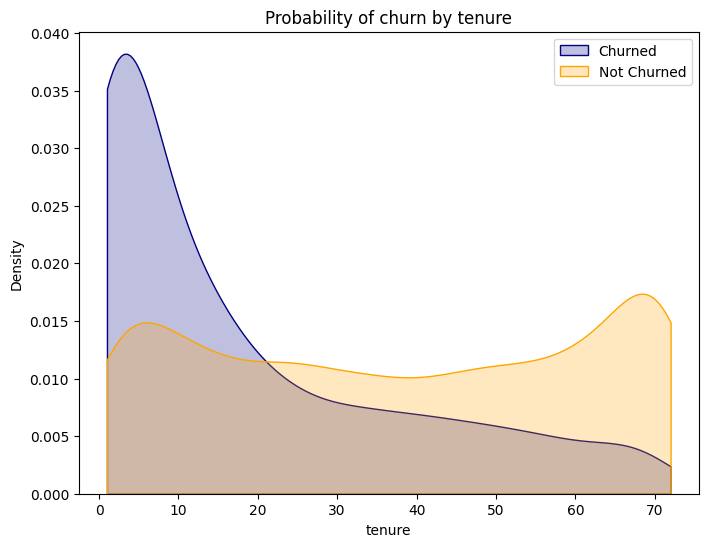

In [109]:
# We use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0= sns.kdeplot(merged_data[merged_data['Churn'] == 'Yes'][x], color='navy', label='Churn:Yes', fill =True, cut=0)
    ax1= sns.kdeplot(merged_data[merged_data['Churn'] == 'No'][x], color='orange', label='Churn:No', fill=True, cut=0)
    plt.legend(['Churned', 'Not Churned'], loc='upper right')
kdeplot('tenure')

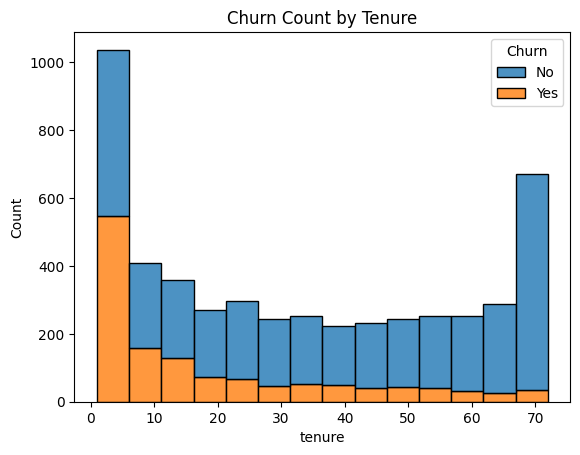

In [110]:
sns.histplot(x='tenure', hue='Churn', data=merged_data, bins=14, alpha=0.8, multiple='stack')
plt.title('Churn Count by Tenure')
plt.show()

- Recent consumers, especially those with a shorter tenure, are more prone to leave.
- Longer-term customers are less likely to leave.

##### 2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

Correlation coefficient: -0.1946279457206517
P-value: 3.6678433707795203e-44


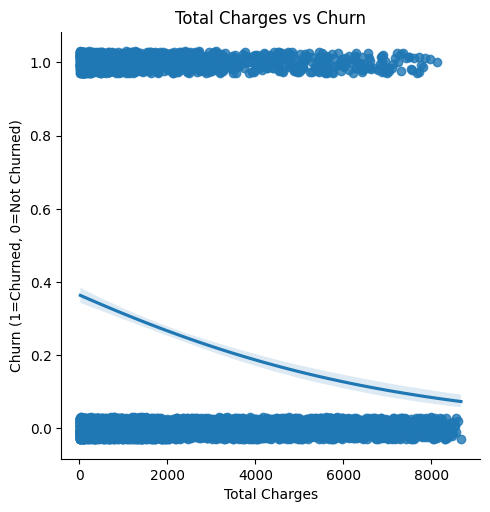

In [112]:
df_temp = df_hypo

# Convert "TotalCharges" column to numeric type and then to integers
df_temp["TotalCharges"] = pd.to_numeric(df_temp["TotalCharges"], errors="coerce", downcast="integer")

# Calculate the point-biserial correlation between TotalCharges and Churn
corr, p_value = stats.pointbiserialr(df_temp["TotalCharges"], df_temp["Churn"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize the relationship between TotalCharges and Churn
# logistic regression for binary dependent variable (Churn)

sns.lmplot(data=df_temp, x="TotalCharges", y="Churn", logistic=True, y_jitter=.03)
plt.xlabel("Total Charges")
plt.ylabel("Churn (1=Churned, 0=Not Churned)")
plt.title("Total Charges vs Churn")
plt.show()

Total charges and churn rates have a weak negative correlation, according to the data. The chance of churn somewhat declines as total charges rise. Although the effect is not very strong, the association is statistically significant (P-value < 0.05).

##### 3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?



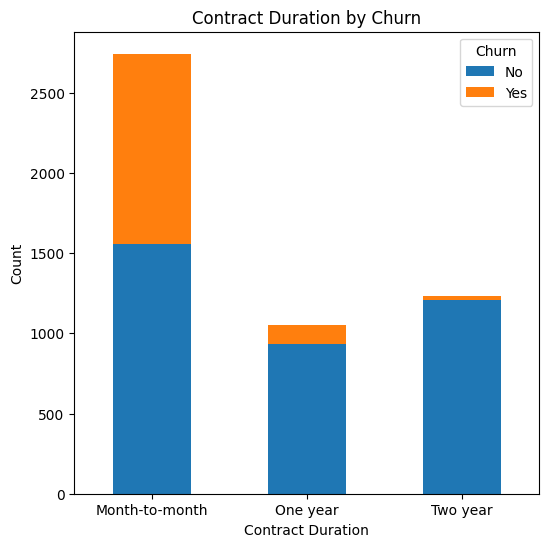

In [113]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(merged_data['Contract'], merged_data['Churn'])

# Plot the stacked bar plot using Seaborn

ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("Contract Duration by Churn")
plt.xlabel("Contract Duration")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()


- The turnover rate is higher for consumers with month-to-month contracts than for those with one-year or longer contracts.

##### 4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

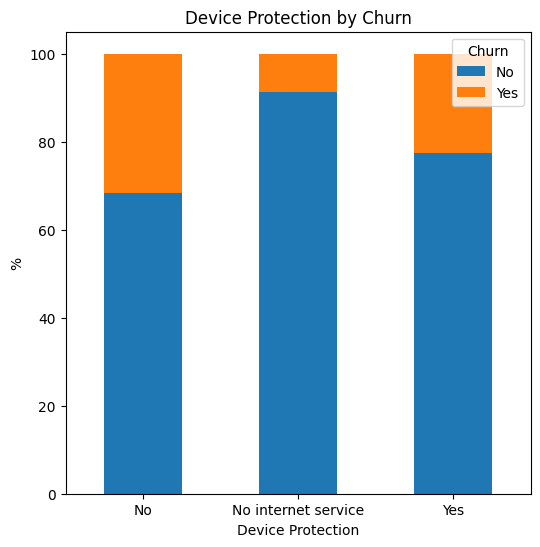

In [114]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(merged_data['DeviceProtection'], merged_data['Churn'])

# Plot the stacked bar plot using Seaborn
percentages = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot the stacked bar plot using Seaborn
ax = percentages.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("Device Protection by Churn")
plt.xlabel("Device Protection")
plt.xticks(rotation=0)
plt.ylabel("%")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Consumers without device protection had a marginally higher chance of leaving, but not by much.

##### 5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

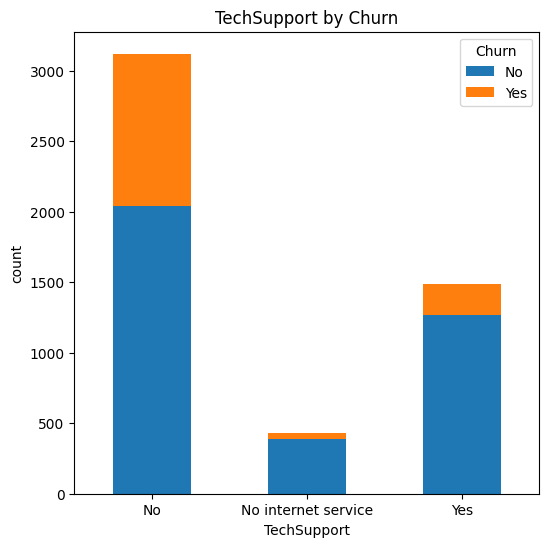

In [115]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(merged_data['TechSupport'], merged_data['Churn'])

# Plot the stacked bar plot using Seaborn
# sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("TechSupport by Churn")
plt.xlabel("TechSupport")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Lack of tech help increased the likelihood of customer attrition.

##### 6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

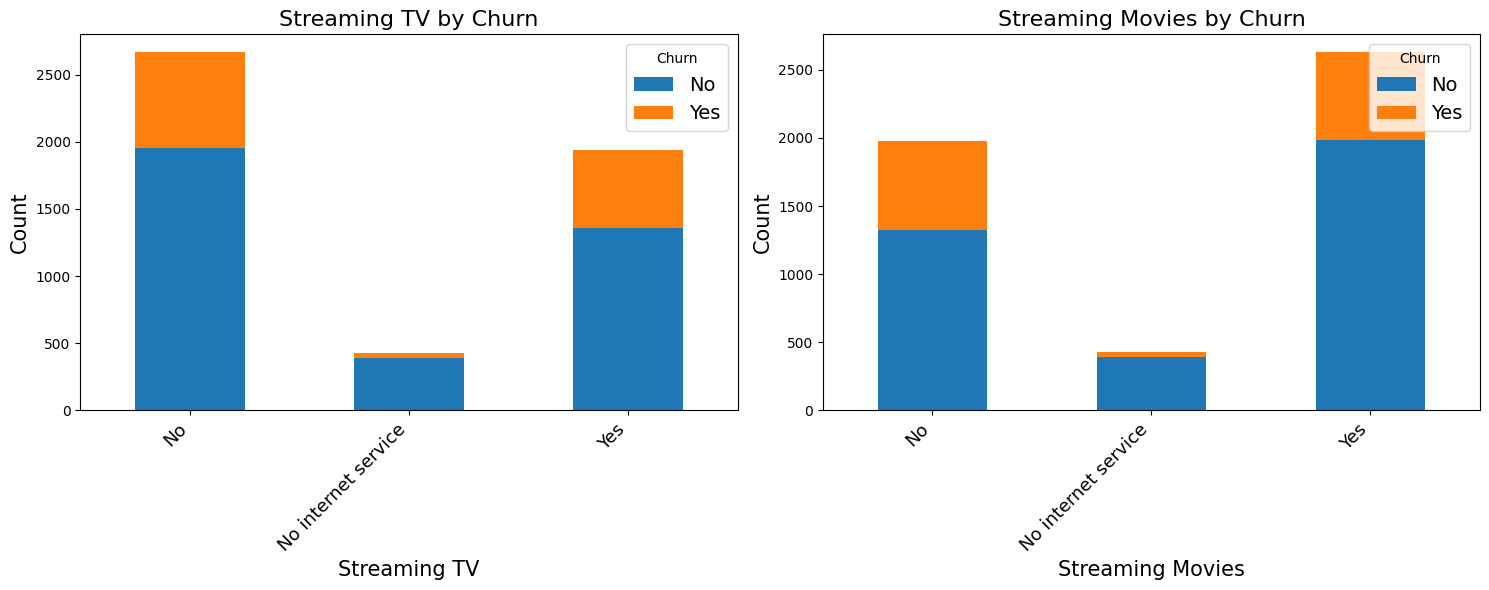

In [116]:
# Create a cross-tabulation (crosstab) of the two categorical columns and 'Churn' column
cross_tab1 = pd.crosstab(merged_data['StreamingTV'], merged_data['Churn'])
cross_tab2 = pd.crosstab(merged_data['StreamingMovies'], merged_data['Churn'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first stacked bar chart
cross_tab1.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Streaming TV by Churn", fontsize=16)
axes[0].set_xlabel("Streaming TV", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].legend(title="Churn", loc="upper right", fontsize=14)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Plot the second stacked bar chart
cross_tab2.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Streaming Movies by Churn", fontsize=16)
axes[1].set_xlabel("Streaming Movies",fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)
axes[1].legend(title="Churn", loc="upper right", fontsize=14)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Adjust layout and display
plt.tight_layout()
plt.show()

- There is no discernible link between churn rates and streaming services.

##### 7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

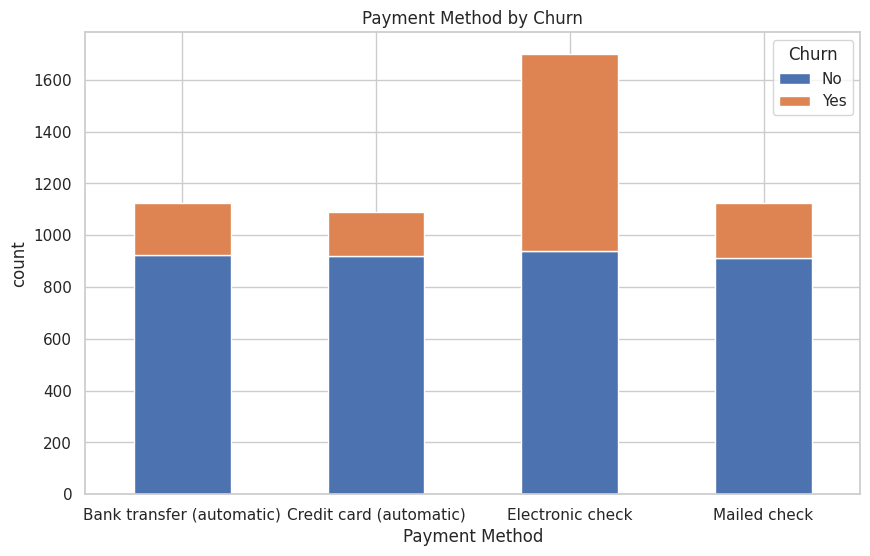

In [117]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(merged_data['PaymentMethod'], merged_data['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Consumers that used electronic checks to pay had a higher turnover rate.

### Multivariate Analysis

Lets look at correlation between numeric values and target variable (Churn)

In [118]:
numeric_columns = df_hypo.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.239642,0.826188,-0.352634
MonthlyCharges,0.239642,1.000000,0.646813,0.201995
TotalCharges,0.826188,0.646813,1.000000,-0.194628
Churn,-0.352634,0.201995,-0.194628,1.000000


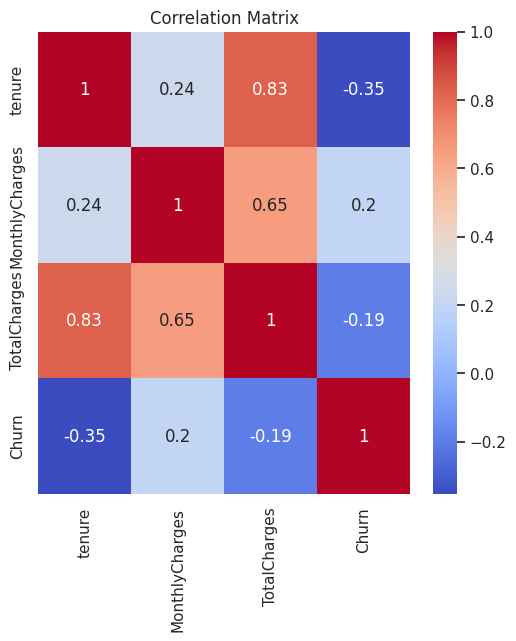

In [119]:
plt.figure(figsize=(6,6))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Tenure vs Churn: The two variables have a moderately negative linear relationship, as seen by the negative correlation coefficient (-0.35) between tenure and churn. 'Churn' rate (the chance of a client leaving the company) tends to go down as 'tenure' (the length of time a customer has been with the organization) goes up.

- MonthlyCharges vs. Churn: The two variables have a weak positive linear relationship, as indicated by the positive correlation coefficient (0.20). The 'Churn' rate tends to rise significantly when 'MonthlyCharges' rise. But compared to "tenure," the link is weaker.

- TotalCharges vs. Churn: The two variables appear to have a modest negative linear relationship, as indicated by the negative correlation (-0.19). The 'Churn' rate tends to somewhat decline when 'TotalCharges' (the total amount charged to the customer) rises. As with 'MonthlyCharges', the link is weaker than with 'tenure'.



In [120]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   object 
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 


### Mutual Information (MI) scores

We calculate the mutual scores between categorical features and the target variable (Churn) in the test dataset. Mutual Information is a measure of the dependence between two variables, which quantifies how much knowing the value of one variable reduces uncertainty about the other variable.

This helps identify which categorical features are more informative in relation to the target variable, making them potentially valuable for predicting or understanding the 'Churn' behavior.

In [122]:
# Lets find out feature dependency on the target variable using mutual information score

x_cat = merged_data.select_dtypes(include=object).drop('Churn', axis=1)
y_cat = merged_data['Churn']

mi_scores = []

#  loop to calculate the Mutual Information Score for each categorical feature
#  with respect to the 'Churn' target variable

for column in x_cat.columns:
    mi_score = mutual_info_score(x_cat[column], y_cat)
    mi_scores.append((column, mi_score))

# sort features by their importance dependency on the target variable,
# with the most important ones at the top.

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"{feature} - {score}")

Contract - 0.10284790516675524
InternetService - 0.05944428811167132
PaymentMethod - 0.04163984913943765
TechSupport - 0.030007109249305178
OnlineSecurity - 0.029670157336360276
PaperlessBilling - 0.019508874345666505
OnlineBackup - 0.015826778687180174
Dependents - 0.015615368107435551
DeviceProtection - 0.013717699147021103
StreamingMovies - 0.013349078621584257
SeniorCitizen - 0.010389723457655958
Partner - 0.010018147440621322
StreamingTV - 0.009953736504141789
MultipleLines - 0.0008281912846177519
PhoneService - 0.00010045042468448395
gender - 3.2190163546386152e-06


In [128]:
features = [score[0] for score in mi_scores]
scores = [score[1] for score in mi_scores]

# Create a bar plot using Plotly
fig = px.bar(x=scores, y=features, orientation='h', color=scores,
             labels={'x': 'Mutual Information Score', 'y': 'Features'},
             title='Categorical Features Relationship with Target (Churn)')

fig.show()

- The mutual scores for gender, phone service, and multiplelines are extremely low—near zero. This implies that they have little to no association with the target variable and minimal predictive value.

In [129]:
# drop columns

merged_data.drop(columns=['gender','PhoneService', 'MultipleLines'], inplace=True)

In [130]:
df_encode = merged_data.copy()

In [131]:
X = df_encode.drop(columns=['Churn'])
y = df_encode['Churn']

### Label Encoding

In [134]:
# Encode the target variable (Churn) to have 0 or 1 instead of No or Yes

labelEncoder = LabelEncoder()

y = labelEncoder.fit_transform(y)

In [135]:
(X.shape, y.shape)

((5034, 16), (5034,))

### One-Hot Encoding

In [142]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X is your original DataFrame with all features

# Define the categorical columns
categorical_columns = ['SeniorCitizen', 'Partner', 'Dependents',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Create the column transformer instance
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), categorical_columns)
)

# Fit and transform the categorical columns
transformed_data = transformer.fit_transform(X[categorical_columns])

# Convert the transformed data into a DataFrame with proper column names
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

# Restore the original index
transformed_df.index = X.index

# Concatenate the transformed DataFrame with the original DataFrame
encoded_df = pd.concat([X, transformed_df], axis=1)

# Drop the original categorical columns
encoded_df.drop(categorical_columns, axis=1, inplace=True)

# Check the resulting DataFrame
print(encoded_df.head())


   tenure  MonthlyCharges  TotalCharges  onehotencoder__SeniorCitizen_No  \
0       1       29.850000     29.850000                              1.0   
1      34       56.950001   1889.500000                              1.0   
2       2       53.849998    108.150002                              1.0   
3      45       42.299999   1840.750000                              1.0   
4       2       70.699997    151.649994                              1.0   

   onehotencoder__SeniorCitizen_Yes  onehotencoder__Partner_No  \
0                               0.0                        0.0   
1                               0.0                        1.0   
2                               0.0                        1.0   
3                               0.0                        1.0   
4                               0.0                        1.0   

   onehotencoder__Partner_Yes  onehotencoder__Dependents_No  \
0                         1.0                           1.0   
1                   

In [143]:
encoded_df.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__SeniorCitizen_No,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__InternetService_DSL,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
0,1,29.850000,29.850000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,56.950001,1889.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.849998,108.150002,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45,42.299999,1840.750000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,70.699997,151.649994,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [144]:
encoded_df.columns = encoded_df.columns.str.replace('onehotencoder__', '')

In [145]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5034 non-null   int64  
 1   MonthlyCharges                           5034 non-null   float64
 2   TotalCharges                             5034 non-null   float64
 3   SeniorCitizen_No                         5034 non-null   float64
 4   SeniorCitizen_Yes                        5034 non-null   float64
 5   Partner_No                               5034 non-null   float64
 6   Partner_Yes                              5034 non-null   float64
 7   Dependents_No                            5034 non-null   float64
 8   Dependents_Yes                           5034 non-null   float64
 9   InternetService_DSL                      5034 non-null   float64
 10  InternetService_Fiber optic              5034 no

### Features Scaling

In [148]:
# standardization for numeric values

cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

encoded_scaled = scaler.fit_transform(encoded_df[cols])

# Create new DataFrames with the scaled values
X_scaled_df = pd.DataFrame(encoded_scaled, columns=cols, index=X.index)

# Drop the original unscaled columns
encoded_df.drop(cols, axis=1, inplace=True)

# Concatenate the scaled columns with the original DataFrames
encoded_df = pd.concat([encoded_df, X_scaled_df], axis=1)

In [149]:
encoded_df.head()

,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.290184,-1.172700,-1.001315
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.056283,-0.271320,-0.181408
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.249382,-0.374430,-0.966794
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.505106,-0.758597,-0.202901
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.249382,0.186022,-0.947615


### Train set Balancing (SMOTE Algorithm)

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in a binary classification problem.

Earlier we realised that our target vaiable has a class imbalance. One class (the minority class) has significantly fewer instances than the other class (the majority class). This imbalance can negatively impact the performance of machine learning models, as they might become biased toward the majority class.

SMOTE will aim to balance the class distribution by generating synthetic samples until the minority class has the same number of instances as the majority class. By creating synthetic samples, SMOTE helps the model better capture the patterns in the minority class and prevents it from favoring the majority class due to the imbalance.

In [151]:
# apply SMOTE to the training data (oversampling)

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(encoded_df, y)

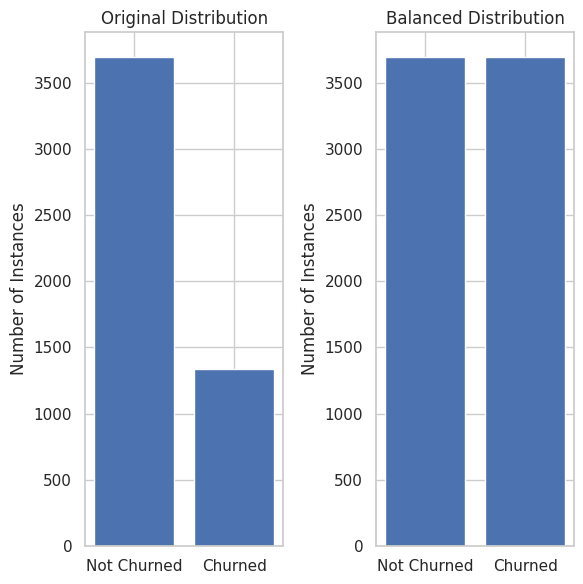

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Plot the first bar graph for the original distribution
unique, counts = np.unique(y, return_counts=True)
axes[0].bar(unique, counts)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Churned', 'Churned'])
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Original Distribution')

# Plot the second bar graph for a separate y value
unique2, counts2 = np.unique(y_resampled, return_counts=True)
axes[1].bar(unique2, counts2)
axes[1].set_xticks([0, 1])  # Adjust as needed
axes[1].set_xticklabels(['Not Churned', 'Churned'])  # Adjust labels
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Balanced Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

Train dataset is now balanced

#### Train-test split

In [156]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [157]:
# check shape after resampling

pd.DataFrame(X_train).shape, pd.DataFrame(y_train).shape

((5916, 39), (5916, 1))

In [158]:
# view class distribution

pd.value_counts(pd.Series(y_train))

<ipython-input-158-c6a2977ab764>:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
0,2958
1,2958


# 4. Model Building

## 1. Logistic Regression Model

In [161]:
LR = LogisticRegression(random_state=42)

# Train the model
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Model 2. K-nearest Neighbors

In [163]:
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Model 3. Random Forest Classifier

In [167]:
rfm = RandomForestClassifier(random_state=42)

# Train the model
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model 4. Support Vector Machines Classifier

In [170]:
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

SVC(random_state=42)

## Model 5. Gradient Boosting

In [171]:
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Model 6. XGBoost

In [172]:
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# 5. Model Evaluation


**K-Fold Cross-Validation**

In [174]:
# Create a dataframe with the K-fold Cross-Validation results

models = [
    ('Logistic Regression', LR),
    ('K nearest neighbors', knn),
    ('Random Forest', rfm),
    ('SVC', svm),
    ('Gradient Boosting', gb),
    ('XGBoost', xgb)
]

# number of k-folds
k = 5

results = []

for name, model in models:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Create a KFold object
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    # Append results to the list
    results.append((name, scores.mean(), scores.std()))

results_df = pd.DataFrame(results, columns=['Model', 'Mean Accuracy', 'Std Deviation'])

results_df.sort_values(by='Mean Accuracy', ascending=False)

,Model,Mean Accuracy,Std Deviation
2,Random Forest,0.846687,0.007357
5,XGBoost,0.843982,0.009783
4,Gradient Boosting,0.839587,0.014250
3,SVC,0.806117,0.009330
1,K nearest neighbors,0.787186,0.009437
0,Logistic Regression,0.775690,0.013500


The Random Forest Classifier model has the highest mean accuracy (85%) among the models.

## Classification Report

In [176]:
model_names = ['Logistic Regression', 'k-NN', 'Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost']
models = [LR, knn, rfm, svm, gb, xgb]
model_names_list = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each model to calculate metrics and store information
for name, model in zip(model_names, models):
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store model name and metrics
    model_names_list.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame with the calculated metrics
metrics_df = pd.DataFrame({
    'Model': model_names_list,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Display the DataFrame
metrics_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.854054,0.846561,0.864865,0.855615
5,XGBoost,0.851351,0.848525,0.855405,0.851952
4,Gradient Boosting,0.841892,0.824359,0.868919,0.846053
3,SVM,0.798649,0.779040,0.833784,0.805483
1,k-NN,0.790541,0.734205,0.910811,0.813028
0,Logistic Regression,0.777703,0.754647,0.822973,0.787330


- The XGBoost is our highest performing model with an accuracy of 85%.


In [178]:
# Sort the DataFrame by the 'Accuracy' column in ascending order
metrics_df_sorted = metrics_df.sort_values(by='Accuracy')

# Create the plot
fig = px.bar(metrics_df_sorted, x='Model', y='Accuracy', color='Model',
             title='Model Performance Metrics (Accuracy)',
             labels={'Model': 'Model Name', 'Accuracy': 'Accuracy Score'}
            )

# Show the plot
fig.show()

## Hyperparameter tuning

We will Fine-tune our top 3 models using a ` RandomizedSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top 3 models, then compare them again to select the best one.

### 1. Tuning Model 1 (XGBoost)

In [179]:
# Check current model parameters

current_params = xgb.get_params()
current_params

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [182]:
# XGBoost model tuning

param_dist = {
    'n_estimators': [None, 50, 100, 500, 1000],
    'max_depth': [None, 3, 5, 7, 10],
    'min_child_weight': [None, 1, 2, 4, 6],
    'subsample': [None, 0.1, 0.2, 0.4, 0.6],
    'gamma': [None, 0, 0.1, 0.2, 0.3],
    'learning_rate': [None, 0.1, 0.2, 0.3],
    'reg_alpha': [None, 0, 0.1, 0.5, 1],
    'reg_lambda': [None, 0, 0.1, 0.5, 1],
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, scoring='accuracy',
                                     cv=5, n_jobs=-1, random_state=42, n_iter=150, verbose = 1)

# fit best estimator on train data
random_search_xgb.fit(X_train, y_train)

# best parameters
best_params = random_search_xgb.best_params_

# mean accuracy score of the best estimator
best_score = random_search_xgb.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'subsample': None,
 'reg_lambda': 0,
 'reg_alpha': 1,
 'n_estimators': 50,
 'min_child_weight': None,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 0}

In [184]:
# mean accuracy score of the best estimator

best_score

0.8539555299170685

In [185]:
# Fit tuned model on train data
tuned_xgb_model = random_search_xgb.best_estimator_
tuned_xgb_model.fit(X_train, y_train)

# make the predictions
random_search_xgb_pred = tuned_xgb_model.predict(X_test)
original_xgb_model = xgb.predict(X_test)

Compare the tuned model and the original model performance

In [186]:
# Calculate the classification report

report = classification_report(y_test, original_xgb_model, output_dict=True)
report_2 = classification_report(y_test, random_search_xgb_pred, output_dict=True)

# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for saving metrics
metrics_original_XGB = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_XGB = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_XGB, index=['Original XGBoost'])
metrics_df_xgb = pd.DataFrame(metrics_Tuned_XGB, index=['Tuned XGBoost'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_xgb])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original XGBoost,0.851374,0.851351,0.851349,0.851351
Tuned XGBoost,0.856488,0.856081,0.856040,0.856081


In [189]:
# construct the confusion matrix for tuned model
confusion_matrix_xgb = confusion_matrix(y_test, random_search_xgb_pred)

confusion_matrix_xgb

array([[621, 119],
       [ 94, 646]])

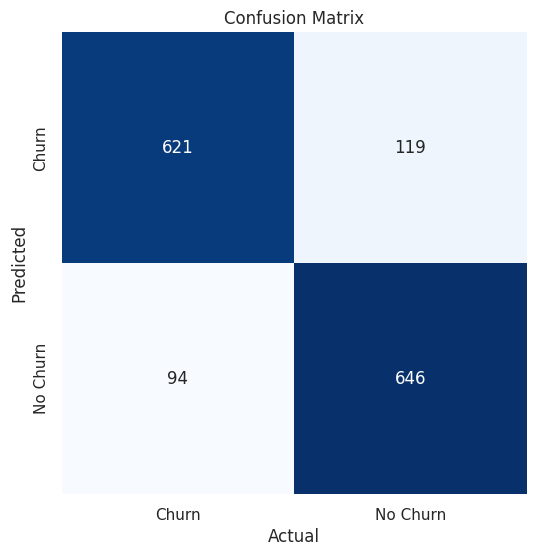

In [190]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Churn', 'No Churn'],
            yticklabels=['Churn', 'No Churn'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- 621 instances were correctly classified as True Positivess (TP).
- 119 instances were classified as False Positives (FP).
- 94 instances were classified as False Negatives (FN).
- 646 instances were correctly classified as True Negatives (TN).

### 2. Tuning Model 2 (Random Forest)

In [191]:
# Check current model parameters

current_params = rfm.get_params()
current_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [192]:
# Random Forest tuning

# Define the parameter distributions for hyperparameter tuning
param_grid = {
  'n_estimators': [20, 50, 100, 200, 300],
  'max_depth': [None, 10, 15, 20, 25],
  'min_samples_split': [2, 3, 4, 5, 6],
  'min_samples_leaf': [1, 2, 3, 4, 5],
  'class_weight': ['balanced', None],
  'max_features': ['auto', 'sqrt', 'log2'],
  'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV with the RandomForestClassifier model and parameter distributions
random_search_rf = RandomizedSearchCV(estimator=rfm, param_distributions=param_grid,
                                      scoring='accuracy', n_iter=150, random_state=42,
                                      cv=5, n_jobs=-1, verbose = 1)

# fit best estimator on train data
random_search_rf.fit(X_train, y_train)

# best parameters
best_params = random_search_rf.best_params_

# mean accuracy score of the best estimator
best_score = random_search_rf.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


265 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': None}

In [193]:
# mean accuracy score of the best estimator

best_score

0.8502356011971397

In [194]:
# Fit tuned model on train data

tuned_rf_model = random_search_rf.best_estimator_
tuned_rf_model.fit(X_train, y_train)

# make the predictions
random_search_rf_pred = tuned_rf_model.predict(X_test)
original_rf_model = rfm.predict(X_test)

In [195]:
# Calculate the classification report

report = classification_report(y_test, original_rf_model, output_dict=True)
report_2 = classification_report(y_test, random_search_rf_pred, output_dict=True)

# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for metrics
metrics_original_Random_Forest = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_Random_Forest = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_Random_Forest, index=['Original Random Forest'])
metrics_df_tuned = pd.DataFrame(metrics_Tuned_Random_Forest, index=['Tuned Random Forest'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_tuned])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original Random Forest,0.854220,0.854054,0.854037,0.854054
Tuned Random Forest,0.858551,0.858108,0.858064,0.858108


In [196]:
# construct the confusion matrix for tuned model
confusion_matrix_rf = confusion_matrix(y_test, random_search_rf_pred)

confusion_matrix_rf

array([[622, 118],
       [ 92, 648]])

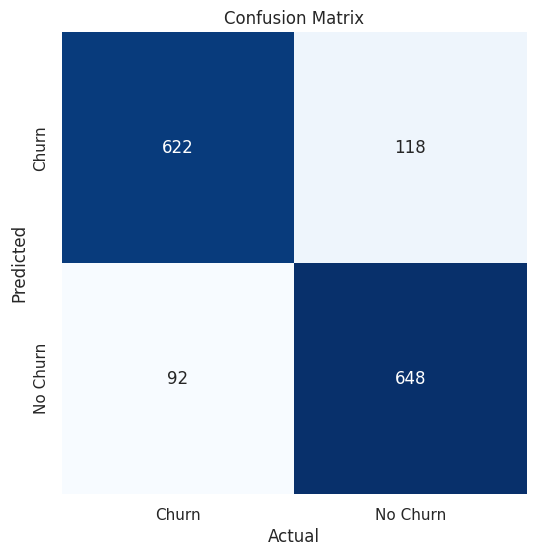

In [197]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Churn', 'No Churn'],
            yticklabels=['Churn', 'No Churn'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- 622 instances were correctly classified as True Positivess (TP).
- 118 instances were classified as False Positives (FP).
- 92 instances were classified as False Negatives (FN).
- 648 instances were correctly classified as True Negatives (TN).

### 3. Tuning Model 3 (Gradient Boosting)

In [198]:
# Check current model parameters

current_params = gb.get_params()
current_params

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [199]:
# Gradient boost tuning

param_grid = {
    'n_estimators': [None, 50, 100, 200, 300],
    'learning_rate': [None, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [None, 3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0, 1.1, 1.2],
    'min_samples_split': [2, 3, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, scoring='accuracy',
                                      cv=5,n_jobs=-1, n_iter=150, random_state=42, verbose = 2)

# fit best estimator on train data
random_search_gb.fit(X_train, y_train)

# best parameters
best_params = random_search_gb.best_params_

# mean accuracy score of the best estimator
best_score = random_search_gb.best_score_

best_params

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


610 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'subsample': 0.8,
 'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.2,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.1,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.0}

In [200]:
# mean accuracy score of the best estimator

best_score

0.8509129903360673

In [201]:
# Fit tuned model on train data
tuned_gb_model = random_search_gb.best_estimator_
tuned_gb_model.fit(X_train, y_train)

# make the predictions
random_search_gb_pred = tuned_gb_model.predict(X_test)
original_gb_model = gb.predict(X_test)

In [202]:
# Calculate the classification report

report = classification_report(y_test, original_gb_model, output_dict=True)
report_2 = classification_report(y_test, random_search_gb_pred, output_dict=True)


# Extract precision, recall, f1-score, and accuracy metrics for both classes

precision = ((report['1']['precision'] + report['0']['precision'])) / 2
recall = ((report['1']['recall'] + report['0']['recall'])) / 2
f1 = ((report['1']['f1-score'] + report['0']['f1-score'])) / 2

precision2 = ((report_2['1']['precision'] + report_2['0']['precision'])) / 2
recall2 = ((report_2['1']['recall'] + report_2['0']['recall'])) / 2
f12 = ((report_2['1']['f1-score'] + report_2['0']['f1-score'])) / 2

# Create dictionaries for metrics
metrics_original_GB = {
    'Total Precision': precision,
    'Total Recall': recall,
    'Total F1-Score': f1,
    'Accuracy': report['accuracy']
}

metrics_Tuned_GB = {
    'Total Precision': precision2,
    'Total Recall': recall2,
    'Total F1-Score': f12,
    'Accuracy': report_2['accuracy']
}

# Create DataFrames from the metrics dictionaries
metrics_df_original = pd.DataFrame(metrics_original_GB, index=['Original Gradient Boosting'])
metrics_df_gb = pd.DataFrame(metrics_Tuned_GB, index=['Tuned Gradient Boosting'])

# Concatenate the DataFrames vertically to combine the metrics
combined_metrics_df = pd.concat([metrics_df_original, metrics_df_gb])

combined_metrics_df

,Total Precision,Total Recall,Total F1-Score,Accuracy
Original Gradient Boosting,0.842894,0.841892,0.841776,0.841892
Tuned Gradient Boosting,0.852367,0.852027,0.851991,0.852027


In [203]:
# construct the confusion matrix for tuned model
confusion_matrix_gb = confusion_matrix(y_test, random_search_gb_pred)

confusion_matrix_gb

array([[619, 121],
       [ 98, 642]])

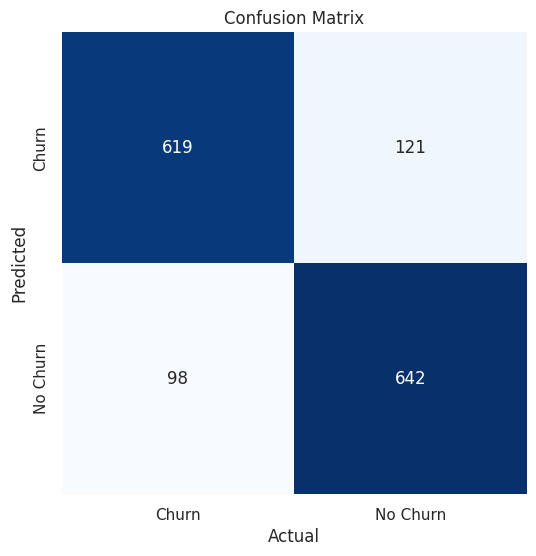

In [204]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Churn', 'No Churn'],
            yticklabels=['Churn', 'No Churn'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- 619 instances were correctly classified as True Positivess (TP).
- 121 instances were classified as False Positives (FP).
- 98 instances were classified as False Negatives (FN).
- 642 instances were correctly classified as True Negatives (TN).

- After tuning, all models have approximately similar accuracies. The Random Forest Model will be saved to make predictions.

# Conclusion

- The two most significant factors that are strongly correlated with customer attrition are the length of time the client has been with the business (tenure) and the length of their contract.

- Early client Experience should be improved since client tenure exhibits a greater turnover rate in the first five to ten months, indicating that early customer experience is crucial.
- Since the data shows that consumers with month-to-month contracts have a far greater churn rate than those with one-year or two-year contracts, it is recommended that long-term contracts be pushed.
